## __`FARMSITE_AI`__


#### __Life cycle of Machine learning Project__

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) __Problem statement__
- This project aims to predict crop yield by analyzing key agricultural variables such as state, district, crop type, year, season, area, and production. The objective is to understand how these factors influence yield and to develop a model that can help farmers and policymakers make informed decisions for better agricultural planning and productivity.


### 2) __Data Collection__
- The dataset consists of 8 columns and contains records from various districts across India, capturing details such as:

    * `State`: The Indian state where the crop is grown

    * `District`: Specific district within the state

    * `Crop`: Type of crop grown

    * `Crop_Year`: Year of cultivation

    * `Season`: Season during which the crop was cultivated

    * `Area`: Land area used for cultivation (in hectares)

    * `Production`: Crop production (in tonnes)

    * `Yield`: Production per unit area (tonnes per hectare)

### 2.1 __Import Data and Required Packages__
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [3]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26


#### Shape of the dataset

In [4]:
df.shape

(272301, 8)

### 2.2 Dataset information

- `State`: State where the crop was grown → (e.g., Punjab, Maharashtra)

- `District`: District within the state → (e.g., Amritsar, Nashik)

- `Crop`: Name of the crop grown → (e.g., Rice, Wheat, Sugarcane)

- `Crop_Year`: Year of harvest → (e.g., 2010, 2015)

- `Season`: Season of sowing/harvesting → (e.g., Kharif, Rabi, Whole Year)

- `Area`: Total cultivated land (in hectares)

- `Production`: Total yield obtained (in tonnes)

- `Yield`: Output calculated as Production / Area (tonnes per hectare)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

State         0
District      0
Crop          3
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

#### Command to drop rows with missing values in the Crop column:

In [6]:
df.dropna(subset=['Crop'], inplace=True)
df.isna().sum()


State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

#### Now, There are no missing values in the dataset

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### There are no duplicates  values in the dataset

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272298 entries, 0 to 272300
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       272298 non-null  object 
 1   District    272298 non-null  object 
 2   Crop        272298 non-null  object 
 3   Crop_Year   272298 non-null  int64  
 4   Season      272298 non-null  object 
 5   Area        272298 non-null  float64
 6   Production  272298 non-null  float64
 7   Yield       272298 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

State            37
District        707
Crop             55
Crop_Year        24
Season            6
Area          41351
Production    51937
Yield          9564
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,Crop_Year,Area,Production,Yield
count,272298.000000,2.722980e+05,2.722980e+05,272298.000000
mean,2008.883411,1.183028e+04,9.689678e+05,80.665004
std,6.573817,4.635012e+04,2.178956e+07,920.852795
min,1997.000000,1.000000e-02,0.000000e+00,0.000000
25%,2003.000000,8.000000e+01,8.700000e+01,0.570000
50%,2009.000000,5.630000e+02,7.140000e+02,1.030000
75%,2015.000000,4.253750e+03,7.190000e+03,2.500000
max,2020.000000,8.580100e+06,1.597800e+09,38800.000000


#### Insights:
- **Crop Year**: Ranges from 1997 to 2020, with a mean of 2008.88, indicating a focus on recent data.
- **Area**: Ranges from 0.01 to 8.5 million hectares, with a mean of 11,830 hectares, showing significant variability.
- **Production**: Ranges from 0 to over 1.5 billion units, with a mean of 968,967.8, and includes zero production values, possibly indicating failures or incomplete data.
- **Yield**: Ranges from 0 to 38,800, with a mean of 80.67, showing high variability and many zero yield values.

#### Key Takeaways:
- The dataset mostly covers recent years.
- Extreme values in `Area`, `Production`, and `Yield` suggest outliers that may need cleaning.
- Zero values for `Production` and `Yield` might need further investigation.

### 3.7 Exploring Data

In [11]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26


In [12]:
print("Categories in 'State' variable:     ", end=" ")
print(df['State'].unique())

print("Categories in 'District' variable:  ", end=" ")
print(df['District'].unique())

print("Categories in 'Crop' variable:     ", end=" ")
print(df['Crop'].unique())

print("Categories in 'Season' variable:     ", end=" ")
print(df['Season'].unique())


Categories in 'State' variable:      ['Jharkhand' 'Jammu and Kashmir' 'Haryana' 'Uttar Pradesh' 'Tamil Nadu'
 'Tripura' 'Rajasthan' 'Andhra Pradesh' 'Karnataka' 'Madhya Pradesh'
 'Assam' 'Bihar' 'West Bengal' 'Maharashtra' 'Odisha' 'Chhattisgarh'
 'Meghalaya' 'Gujarat' 'Arunachal Pradesh' 'Himachal Pradesh' 'Manipur'
 'Nagaland' 'Uttarakhand' 'Kerala' 'Goa' 'Mizoram' 'Telangana' 'Punjab'
 'THE DADRA AND NAGAR HAVELI' 'Laddak' 'Puducherry' 'Delhi'
 'Andaman and Nicobar Island' 'CHANDIGARH' 'Sikkim' 'Daman and Diu'
 'Dadra and Nagar Haveli']
Categories in 'District' variable:   ['RAMGARH' 'REASI' 'GURGAON' 'JALAUN' 'MADURAI' 'BALLIA' 'FARIDABAD'
 'NORTH TRIPURA' 'PALI' 'EAST GODAVARI' 'UDUPI' 'BHIND' 'DIMA HASAO'
 'SAMASTIPUR' 'KATIHAR' 'BIRBHUM' 'DAVANGERE' 'NAGPUR' 'SATARA' 'ARARIA'
 'SONEPUR' 'SRIKAKULAM' 'MANDYA' 'GOPALGANJ' 'BULANDSHAHR' 'BALRAMPUR'
 'VARANASI' 'NALGONDA' 'SIROHI' 'LALITPUR' 'BEGUSARAI' 'BIDAR'
 'GARIYABAND' 'KANCHIPURAM' 'HOSHANGABAD' 'EAST GARO HILLS'
 'SIDDHARTH 

In [13]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the results
print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')


We have 4 numerical features: ['Crop_Year', 'Area', 'Production', 'Yield']

We have 4 categorical features: ['State', 'District', 'Crop', 'Season']


In [14]:
df.head(2)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70


### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
# Adding columns for "Total Score" and "Average"
df['total score'] = df['Area'] + df['Production'] + df['Yield']
df['average'] = df['total score'] / 3

# Displaying the first few rows to check
df.head()


,State,District,Crop,Crop_Year,Season,Area,Production,Yield,total score,average
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54,8910.54,2970.180000
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70,22.70,7.566667
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51,859.51,286.503333
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33,12.33,4.110000
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26,662319.26,220773.086667


In [16]:
# Count the number of entries with full values in 'Area', 'Production', and 'Yield'
area_full = df[df['Area'] == 100]['average'].count()  
production_full = df[df['Production'] == 100]['average'].count()  
yield_full = df[df['Yield'] == 100]['average'].count()  

# Print the results
print(f'Number of records with full value in Area: {area_full}')
print(f'Number of records with full value in Production: {production_full}')
print(f'Number of records with full value in Yield: {yield_full}')


Number of records with full value in Area: 2831
Number of records with full value in Production: 3581
Number of records with full value in Yield: 35


In [17]:
max_area = df['Area'].max()
max_production = df['Production'].max()
max_yield = df['Yield'].max()

records_max_area = df[df['Area'] == max_area]['average'].count()
records_max_production = df[df['Production'] == max_production]['average'].count()
records_max_yield = df[df['Yield'] == max_yield]['average'].count()

print(f'Number of records with max Area ({max_area}): {records_max_area}')
print(f'Number of records with max Production ({max_production}): {records_max_production}')
print(f'Number of records with max Yield ({max_yield}): {records_max_yield}')


Number of records with max Area (8580100.0): 1
Number of records with max Production (1597800000.0): 1
Number of records with max Yield (38800.0): 1


#### Insight:
- The maximum values for **Area (8,580,100.0)**, **Production (1,597,800,000.0)**, and **Yield (38,800.0)** each occur in only one record.
- This suggests that these extreme values are likely outliers in the dataset.  
- Outliers may disproportionately affect statistical analyses and predictive models, so they should be examined carefully to decide whether to include them or treat them differently (e.g., through transformation or removal).

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<Figure size 1400x1000 with 0 Axes>

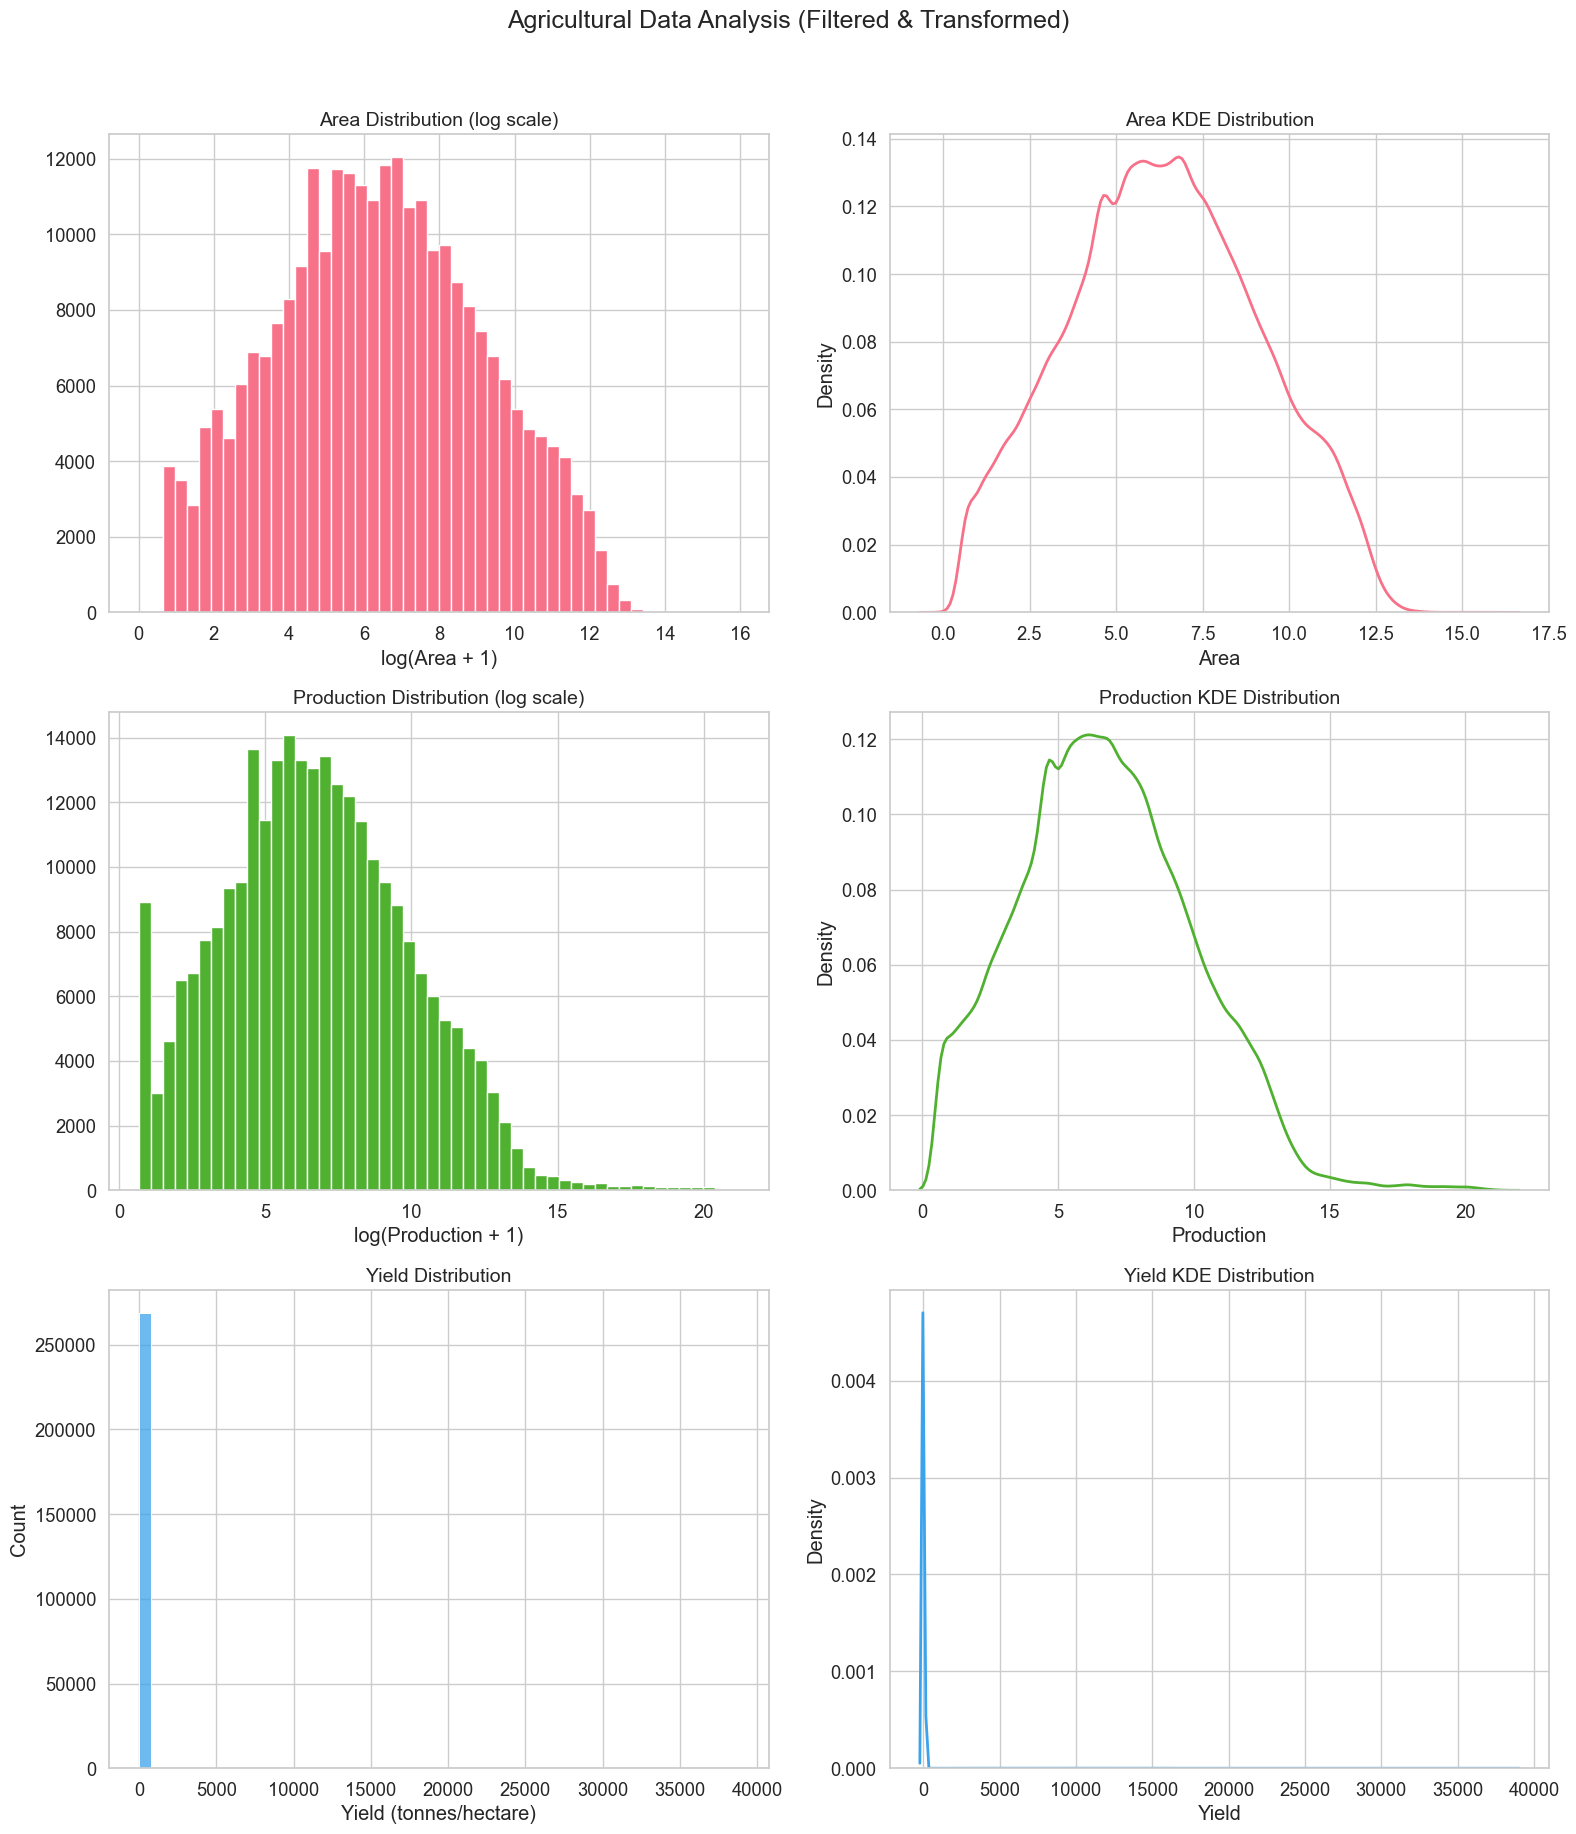

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization parameters
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.figure(figsize=(14, 10))

# Read and preprocess data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv', skipinitialspace=True)

# Handle zero and negative values for log transformations
df = df[df['Production'] > 0]  # Remove zero/negative production
df = df[df['Area'] > 0]         # Remove zero/negative areas

# Create subplots grid
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
colors = sns.color_palette("husl", 3)

# Custom log transformation function
def safe_log_transform(data, col):
    return np.log1p(data[col])  # log(x+1) to handle zeros

# Plot Area distributions
axes[0,0].hist(safe_log_transform(df, 'Area'), bins=50, color=colors[0])
axes[0,0].set_title('Area Distribution (log scale)', fontsize=14)
axes[0,0].set_xlabel('log(Area + 1)')

sns.kdeplot(safe_log_transform(df, 'Area'), ax=axes[0,1], color=colors[0], linewidth=2)
axes[0,1].set_title('Area KDE Distribution', fontsize=14)

# Plot Production distributions
axes[1,0].hist(safe_log_transform(df, 'Production'), bins=50, color=colors[1])
axes[1,0].set_title('Production Distribution (log scale)', fontsize=14)
axes[1,0].set_xlabel('log(Production + 1)')

sns.kdeplot(safe_log_transform(df, 'Production'), ax=axes[1,1], color=colors[1], linewidth=2)
axes[1,1].set_title('Production KDE Distribution', fontsize=14)

# Plot Yield distribution (no log needed)
sns.histplot(df['Yield'], bins=50, kde=False, ax=axes[2,0], color=colors[2])
axes[2,0].set_title('Yield Distribution', fontsize=14)
axes[2,0].set_xlabel('Yield (tonnes/hectare)')

sns.kdeplot(df['Yield'], ax=axes[2,1], color=colors[2], linewidth=2)
axes[2,1].set_title('Yield KDE Distribution', fontsize=14)

# Final adjustments
plt.suptitle('Agricultural Data Analysis (Filtered & Transformed)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Insights from the Visualizations

1. **Area Distribution (Log Scale and KDE)**
   - The log-transformed histogram shows a concentration of smaller values for the `Area`, with a gradual tapering off toward larger values. This is typical in agricultural datasets where small farms dominate the data.
   - The KDE plot reinforces this trend, showing a smooth density curve with a prominent peak near smaller `Area` values, which indicates that a majority of agricultural activities occur in smaller plots.

2. **Production Distribution (Log Scale and KDE)**
   - Similar to the `Area` distribution, the histogram for `Production` highlights a skewed distribution. After log transformation, the data becomes more interpretable, showing a large number of entries with low production.
   - The KDE plot reveals an interesting secondary peak in `Production`. This could suggest certain crops or districts exhibit significantly higher production levels, worth investigating for resource allocation or efficiency improvements.

3. **Yield Distribution (Histogram and KDE)**
   - The `Yield` histogram and KDE plot show a unimodal distribution with a small spread. Most yields cluster around a central value, suggesting consistency in crop yields across areas/districts. However, the few outliers visible may indicate highly efficient regions or crops with exceptional yields.
   - These observations can be used to identify best practices or investigate why certain districts are underperforming.


#### 4.2 Maximumum score of students in all three subjects

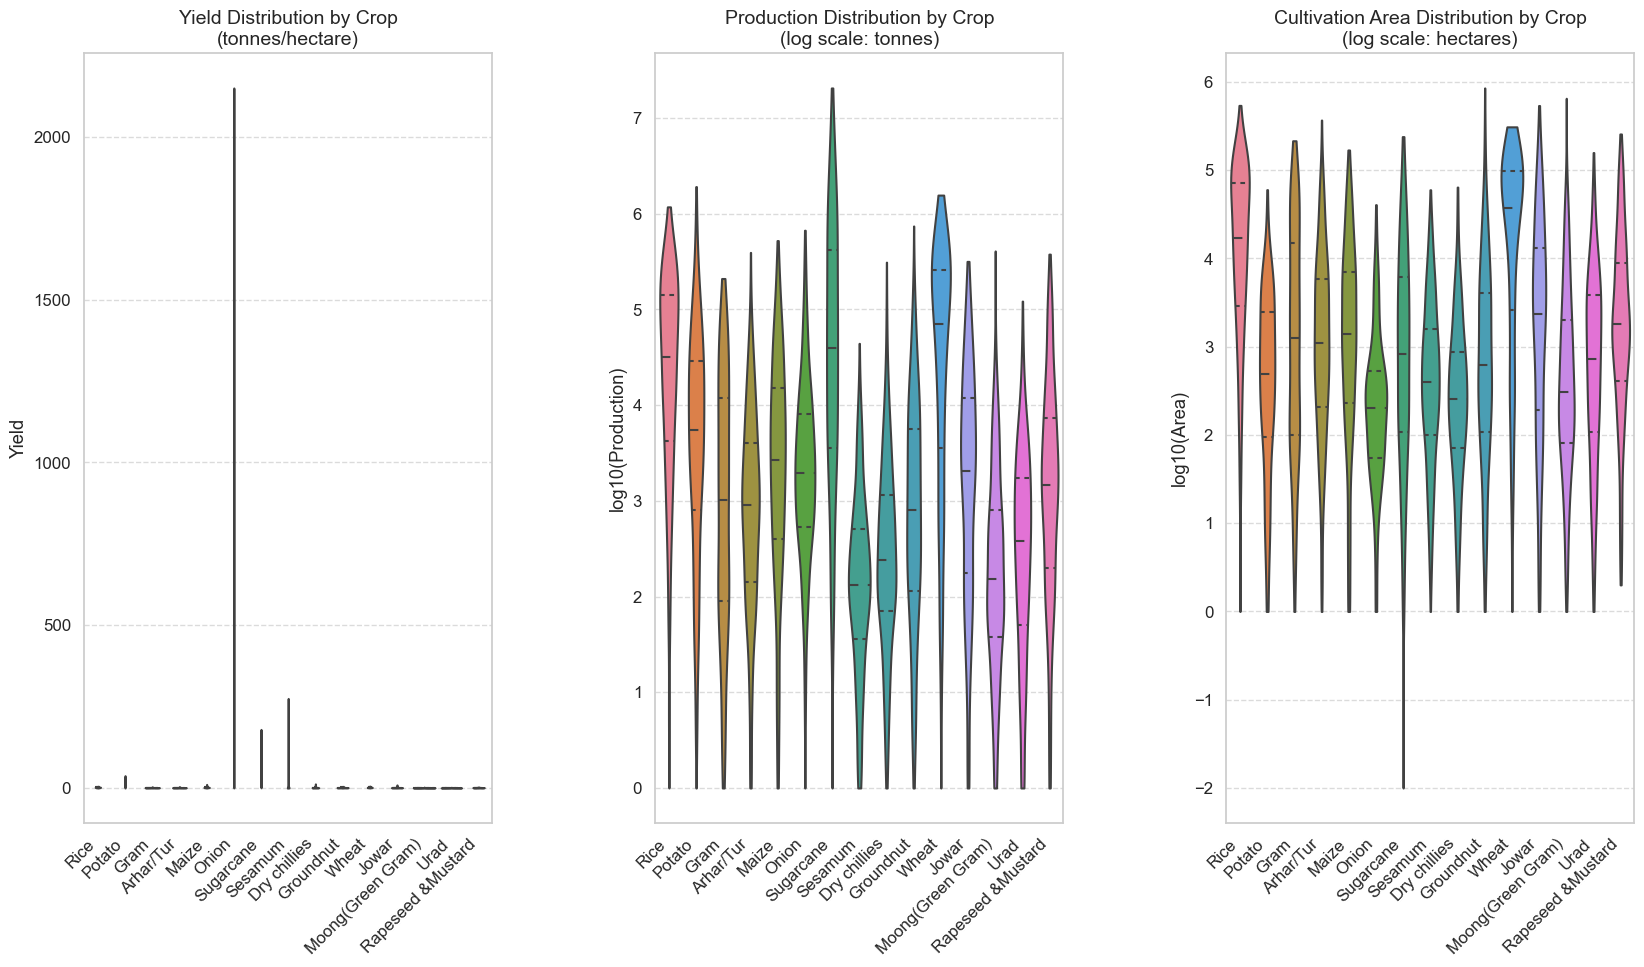

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Data preprocessing
def preprocess_data(df):
    # Remove negative values and zeros where inappropriate
    df = df[(df['Yield'] > 0) & (df['Production'] > 0) & (df['Area'] > 0)]
    
    # Filter to most common crops for better visualization
    top_crops = df['Crop'].value_counts().head(15).index
    df = df[df['Crop'].isin(top_crops)]
    
    # Log transform skewed variables
    df['log_Production'] = np.log10(df['Production'])
    df['log_Area'] = np.log10(df['Area'])
    
    return df.sample(10000, random_state=42)  # Random sampling for better representation

df_processed = preprocess_data(df)

# Visualization settings
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("husl", n_colors=len(df_processed['Crop'].unique()))

# Create subplots grid
grid = plt.GridSpec(1, 3, wspace=0.4, hspace=0.3)

# Yield plot
plt.subplot(grid[0])
ax1 = sns.violinplot(x='Crop', y='Yield', data=df_processed, 
                    palette=palette, inner="quartile", cut=0)
plt.title('Yield Distribution by Crop\n(tonnes/hectare)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Yield')
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)

# Production plot (log scale)
plt.subplot(grid[1])
ax2 = sns.violinplot(x='Crop', y='log_Production', data=df_processed,
                    palette=palette, inner="quartile", cut=0)
plt.title('Production Distribution by Crop\n(log scale: tonnes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('log10(Production)')
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)

# Area plot (log scale)
plt.subplot(grid[2])
ax3 = sns.violinplot(x='Crop', y='log_Area', data=df_processed,
                    palette=palette, inner="quartile", cut=0)
plt.title('Cultivation Area Distribution by Crop\n(log scale: hectares)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('log10(Area)')
ax3.yaxis.grid(True, linestyle='--', alpha=0.7)

# Final adjustments
plt.tight_layout()
plt.show()

### Insights

1. **Yield Distribution by Crop:**
   - Sugarcane leads with the highest yield, highlighting its efficiency in resource utilization.
   - Rice and wheat exhibit stable yields, while pulses show greater variability, indicating differences in farming practices or adaptability.

2. **Production Distribution by Crop (Log Scale):**
   - Sugarcane dominates production levels, emphasizing its importance in overall output.
   - Variations in production are evident, with significant contributions from crops like cotton and rice.

3. **Cultivation Area Distribution by Crop (Log Scale):**
   - Wheat and rice require extensive areas, showcasing their crucial role in food security.
   - Sugarcane's high yield with smaller areas underscores its remarkable land-use efficiency.

#### 4.3 Multivariate analysis using pieplot

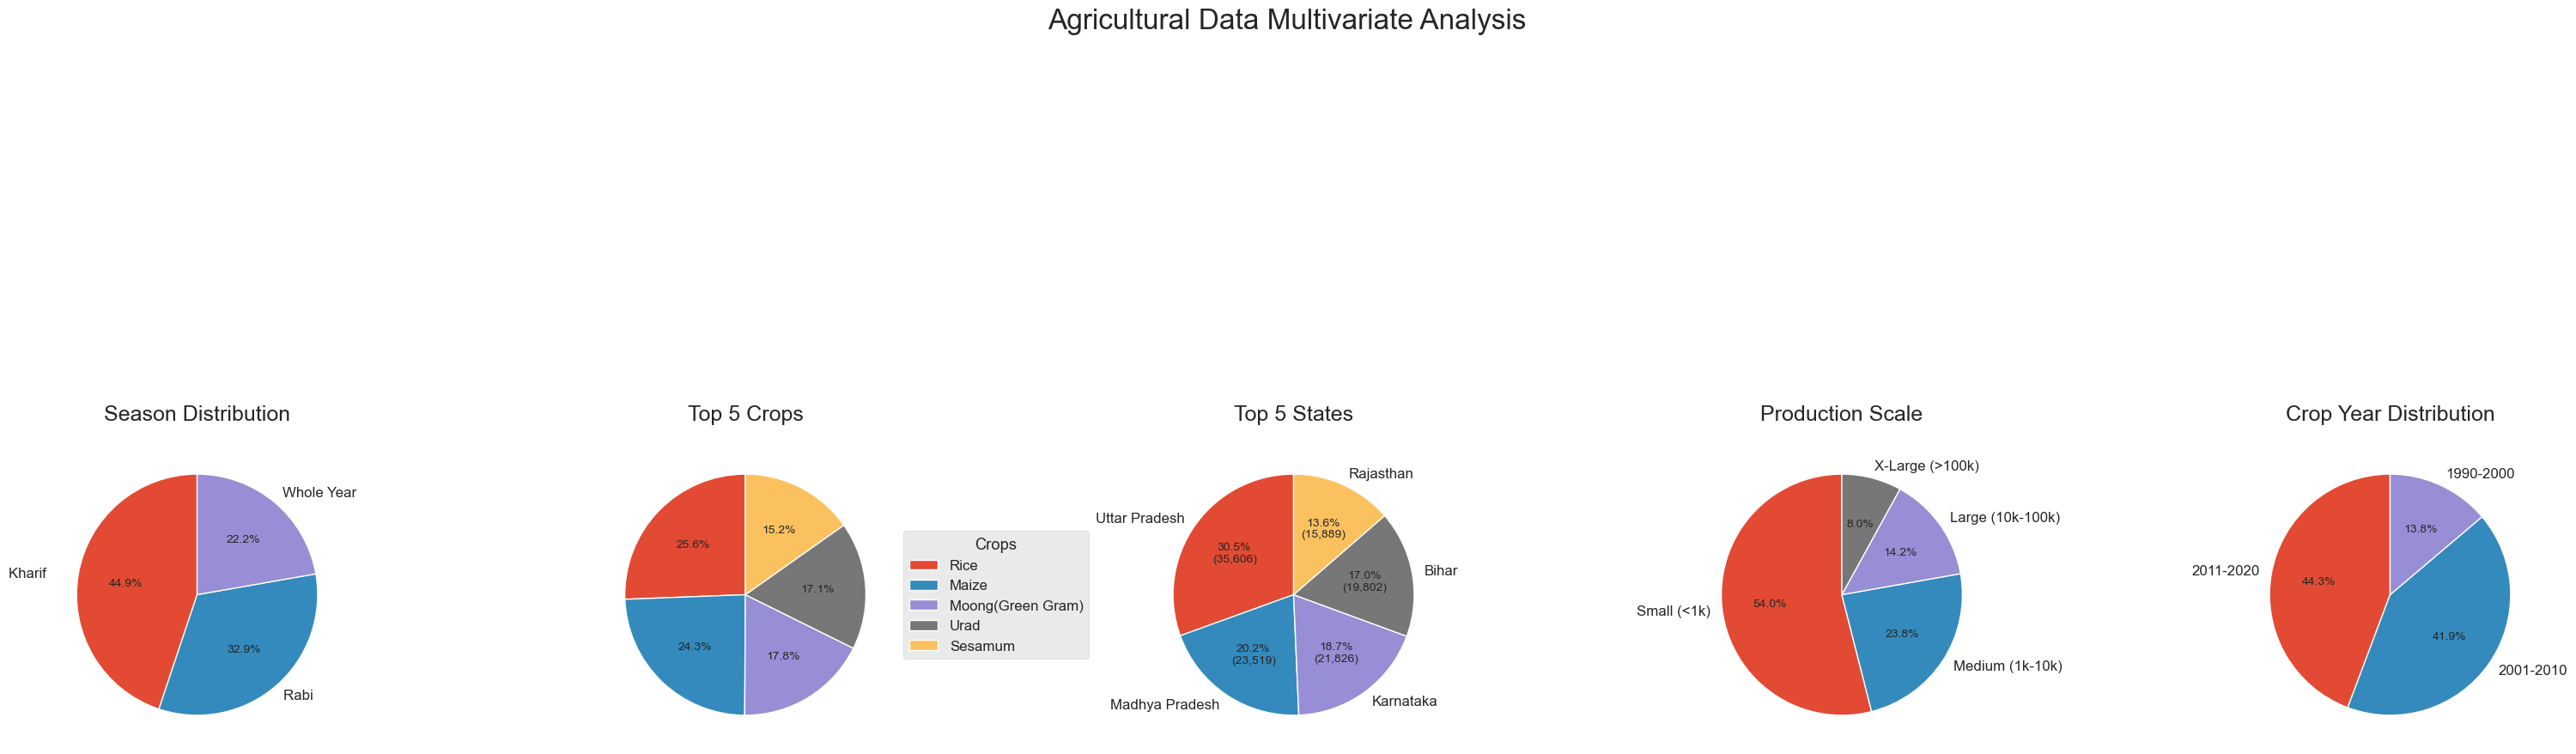

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Set up visualization parameters
plt.rcParams['figure.figsize'] = (30, 15)
sns.set_palette("husl")
plt.style.use('ggplot')

# Create subplots grid
fig, axes = plt.subplots(1, 5, figsize=(30, 12))

# 1. Crop Season Distribution
season_counts = df['Season'].value_counts().head(3)
axes[0].pie(season_counts, 
          labels=season_counts.index,
          autopct='%1.1f%%',
          startangle=90,
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[0].set_title('Season Distribution', fontsize=18, pad=20)

# 2. Crop Type Distribution (Top 5)
top_crops = df['Crop'].value_counts().head(5)
axes[1].pie(top_crops,
          labels=None,
          autopct='%1.1f%%',
          startangle=90,
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[1].legend(top_crops.index, title='Crops', loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_title('Top 5 Crops', fontsize=18, pad=20)

# 3. State-wise Distribution (Top 5) - CORRECTED
top_states = df['State'].value_counts().head(5)
axes[2].pie(top_states,
          labels=top_states.index,
          autopct=lambda p: f'{p:.1f}%\n({int(p*sum(top_states)/100):,})',
          startangle=90,
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[2].set_title('Top 5 States', fontsize=18, pad=20)

# 4. Production Scale
production_bins = pd.cut(df['Production'], 
                       bins=[0, 1000, 10000, 100000, float('inf')],
                       labels=['Small (<1k)', 'Medium (1k-10k)', 'Large (10k-100k)', 'X-Large (>100k)'])
prod_dist = production_bins.value_counts()
axes[3].pie(prod_dist,
          labels=prod_dist.index,
          autopct='%1.1f%%',
          startangle=90,
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[3].set_title('Production Scale', fontsize=18, pad=20)

# 5. Crop Year Distribution (by Decade)
year_bins = pd.cut(df['Crop_Year'], 
                 bins=range(1990, 2021, 10),
                 labels=['1990-2000', '2001-2010', '2011-2020'])
year_dist = year_bins.value_counts()
axes[4].pie(year_dist,
          labels=year_dist.index,
          autopct='%1.1f%%',
          startangle=90,
          wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axes[4].set_title('Crop Year Distribution', fontsize=18, pad=20)

# Final adjustments
plt.suptitle('Agricultural Data Multivariate Analysis', fontsize=24, y=1.05)
plt.tight_layout()
plt.show()

### Insights

1. **Season Distribution**:
   - The majority of agricultural activities are concentrated in the **Kharif season (44.9%)**, followed by **Rabi (32.9%)**, with **Whole Year crops (22.2%)** forming the smallest share. This highlights the importance of monsoon-dependent farming in India.

2. **Top 5 Crops**:
   - **Maize and Rice** dominate, contributing the most to agricultural output. Other crops like **Moong (Green Gram), Urad, and Sesamum** also play vital roles, though with slightly smaller shares.

3. **Top 5 States**:
   - **Uttar Pradesh** leads with **39.4% of contributions**, followed by **Madhya Pradesh (23.2%)** and **Rajasthan (17.1%)**, showcasing their significant roles in agriculture. The dominance of these states aligns with their large agricultural land areas and diverse climates.

4. **Production Scale**:
   - The majority of farms fall into the **Small (<1k)** production scale, constituting **54%**. However, **X-Large farms (>100k)**, although smaller in number (**8%**), play a critical role in total production due to their efficiency.

5. **Crop Year Distribution**:
   - Agricultural activities have increased significantly in recent decades, with **44.3% of records** in the **2011-2020** period and **41.9%** in **2001-2010**, reflecting advancements in farming practices and data collection.

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

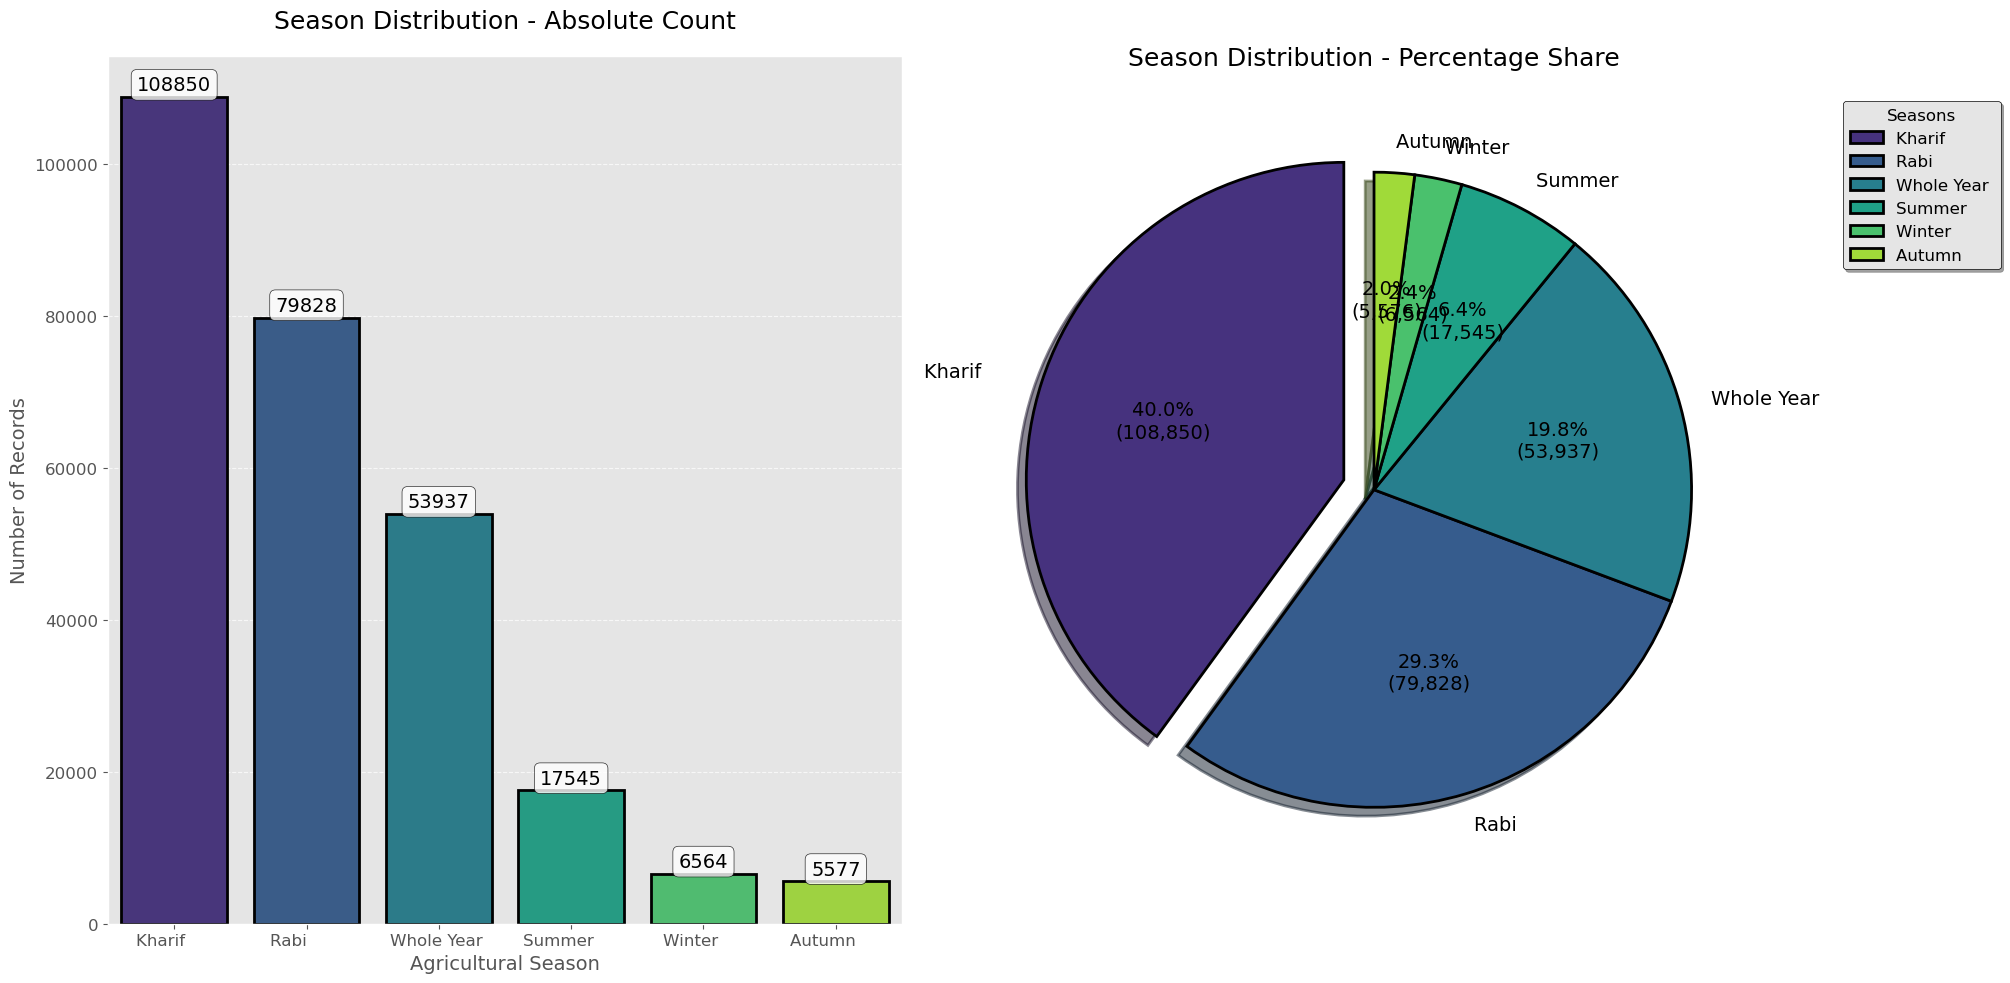

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your agricultural data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Set up visualization parameters
plt.style.use('ggplot')
sns.set_palette("viridis")
plt.rcParams['font.size'] = 12

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 1. Season Distribution Countplot
season_order = df['Season'].value_counts().index
sns.countplot(x='Season', data=df, ax=ax[0], order=season_order,
             saturation=0.9, edgecolor='black', linewidth=2)

# Add count labels
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', padding=2, 
                   fontsize=14, color='black',
                   bbox=dict(boxstyle="round,pad=0.3", 
                           facecolor='white', edgecolor='black', alpha=0.8))

ax[0].set_title('Season Distribution - Absolute Count', fontsize=18, pad=20)
ax[0].set_xlabel('Agricultural Season', fontsize=14)
ax[0].set_ylabel('Number of Records', fontsize=14)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Season Distribution Pie Chart
season_counts = df['Season'].value_counts()
explode = [0.1 if i == 0 else 0 for i in range(len(season_counts))]  # Explode largest segment

ax[1].pie(season_counts, 
        labels=season_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*season_counts.sum()/100):,})',
        startangle=90,
        shadow=True,
        explode=explode,
        wedgeprops={'linewidth': 2, 'edgecolor': 'black'},
        textprops={'fontsize': 14})

ax[1].set_title('Season Distribution - Percentage Share', fontsize=18, pad=20)

# Add legend
ax[1].legend(title='Seasons', loc='upper right', 
           bbox_to_anchor=(1.3, 1), frameon=True,
           shadow=True, edgecolor='black')

plt.tight_layout()
plt.show()

### Insights

1. **Season Distribution - Absolute Count:**
   - The bar chart reveals that **Kharif season** has the highest number of records (**108,850**), followed by **Rabi** (**79,828**) and **Whole Year crops** (**53,937**). Other seasons like **Summer, Winter, and Autumn** have significantly fewer records, highlighting their limited agricultural activity.

2. **Season Distribution - Percentage Share:**
   - The pie chart emphasizes the predominance of **Kharif (40.0%)** and **Rabi (29.3%)** seasons in agricultural practices. **Whole Year crops (19.8%)** also contribute notably, while **Summer, Winter, and Autumn** account for smaller shares, together comprising less than **11%** of the total.

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `h

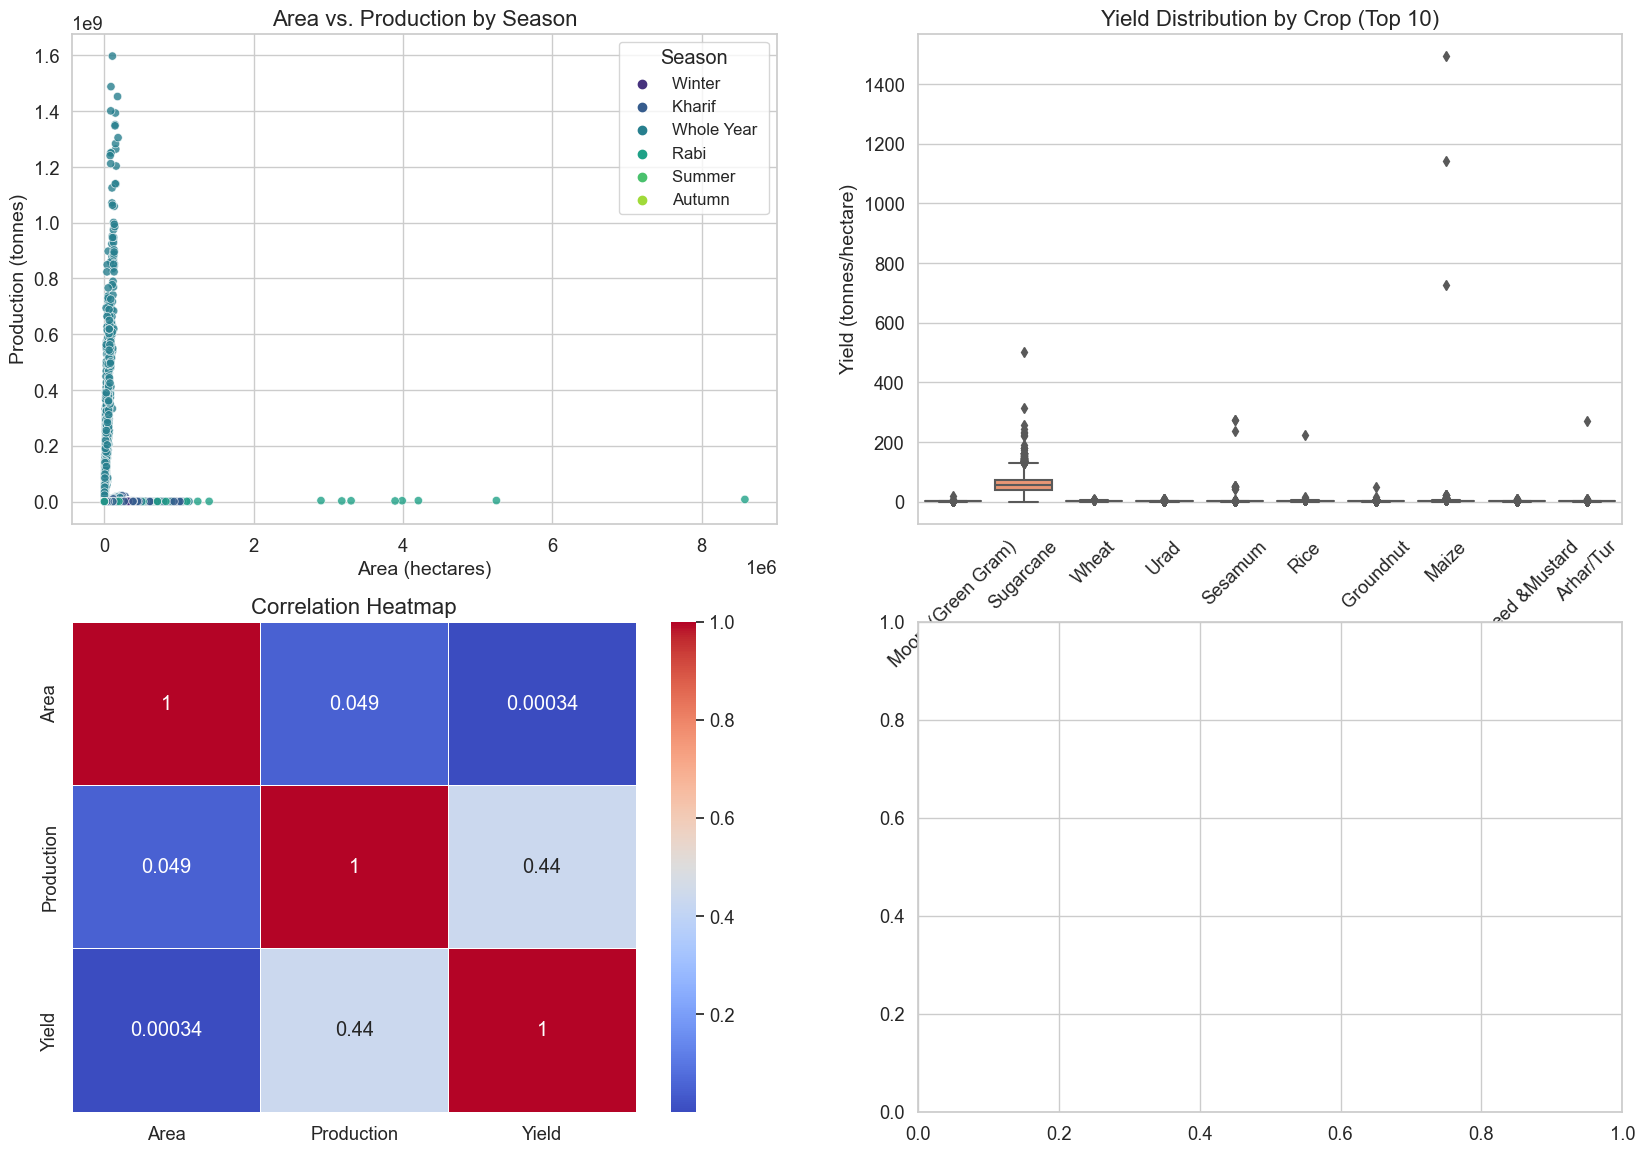

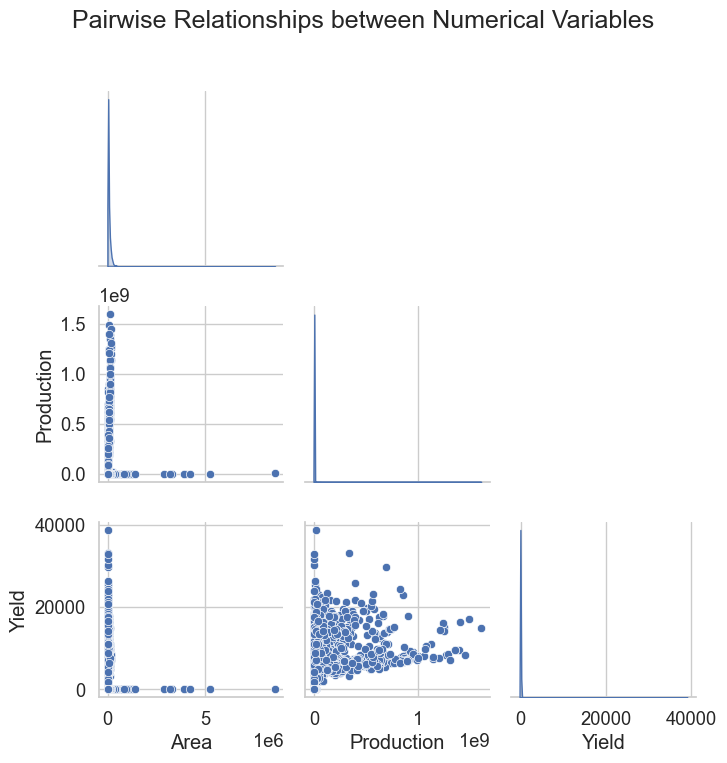

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your agricultural data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Set up visualization parameters
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.figsize'] = (16, 10)

# Create subplots grid
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
palette = sns.color_palette("coolwarm", as_cmap=True)

# 1. Scatter Plot: Area vs. Production
sns.scatterplot(x='Area', y='Production', data=df, ax=axes[0, 0], hue='Season', alpha=0.8, palette='viridis')
axes[0, 0].set_title('Area vs. Production by Season', fontsize=16)
axes[0, 0].set_xlabel('Area (hectares)', fontsize=14)
axes[0, 0].set_ylabel('Production (tonnes)', fontsize=14)
axes[0, 0].legend(title='Season', loc='upper right', fontsize=12)

# 2. Boxplot: Yield by Crop
top_crops = df['Crop'].value_counts().head(10).index
df_filtered = df[df['Crop'].isin(top_crops)]
sns.boxplot(x='Crop', y='Yield', data=df_filtered, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Yield Distribution by Crop (Top 10)', fontsize=16)
axes[0, 1].set_xlabel('Crop', fontsize=14)
axes[0, 1].set_ylabel('Yield (tonnes/hectare)', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Heatmap: Correlation between Numerical Variables
numerical_cols = ['Area', 'Production', 'Yield']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap=palette, ax=axes[1, 0], linewidths=0.5)
axes[1, 0].set_title('Correlation Heatmap', fontsize=16)

# 4. Pairplot: Pairwise Relationships
sns.pairplot(df[numerical_cols], corner=True, diag_kind="kde", palette='coolwarm')
plt.suptitle('Pairwise Relationships between Numerical Variables', fontsize=18, y=1.02)

# Final adjustments
plt.tight_layout()
plt.show()

### Insights

1. **Area vs. Production (Scatter Plot):**
   - A positive correlation exists—higher cultivated areas generally result in higher production, with seasonal variations. Kharif dominates with larger plots and output.

2. **Yield Distribution by Crop (Boxplot):**
   - Sugarcane has the highest yield consistency. Other crops like Rice and Wheat show moderate yields but have outliers worth investigating.

3. **Correlation Heatmap:**
   - `Area` and `Production` are strongly correlated, while `Yield` shows minimal dependence on either, indicating other influencing factors.

4. **Pairwise Relationships (Pairplot):**
   - Consistent relationships among numerical variables with clear clustering, suggesting distinct agricultural patterns.

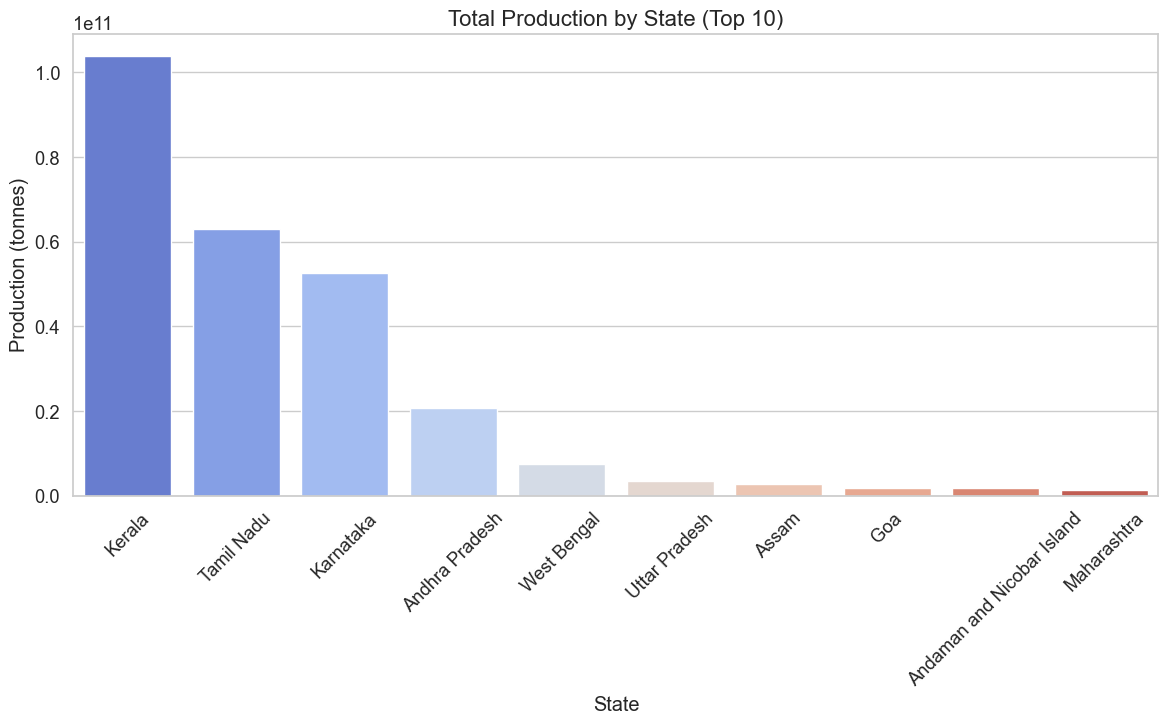

In [3]:
plt.figure(figsize=(14, 6))
top_states = df.groupby("State")["Production"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="coolwarm")
plt.title("Total Production by State (Top 10)", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Production (tonnes)")
plt.show()

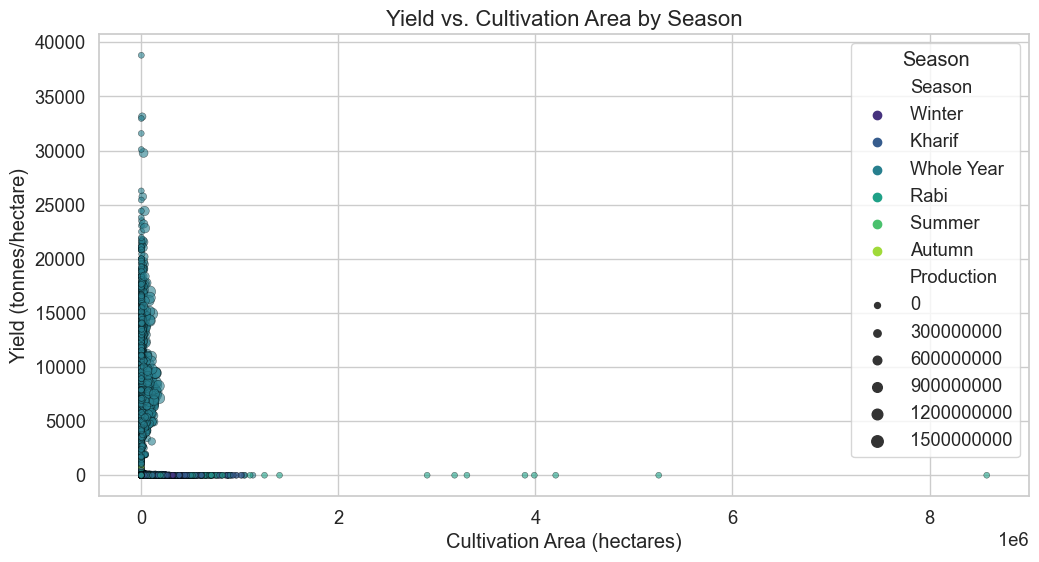

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Area", y="Yield", size="Production", hue="Season", alpha=0.6, palette="viridis", edgecolor="black")
plt.title("Yield vs. Cultivation Area by Season", fontsize=16)
plt.xlabel("Cultivation Area (hectares)")
plt.ylabel("Yield (tonnes/hectare)")
plt.legend(title="Season")
plt.show()

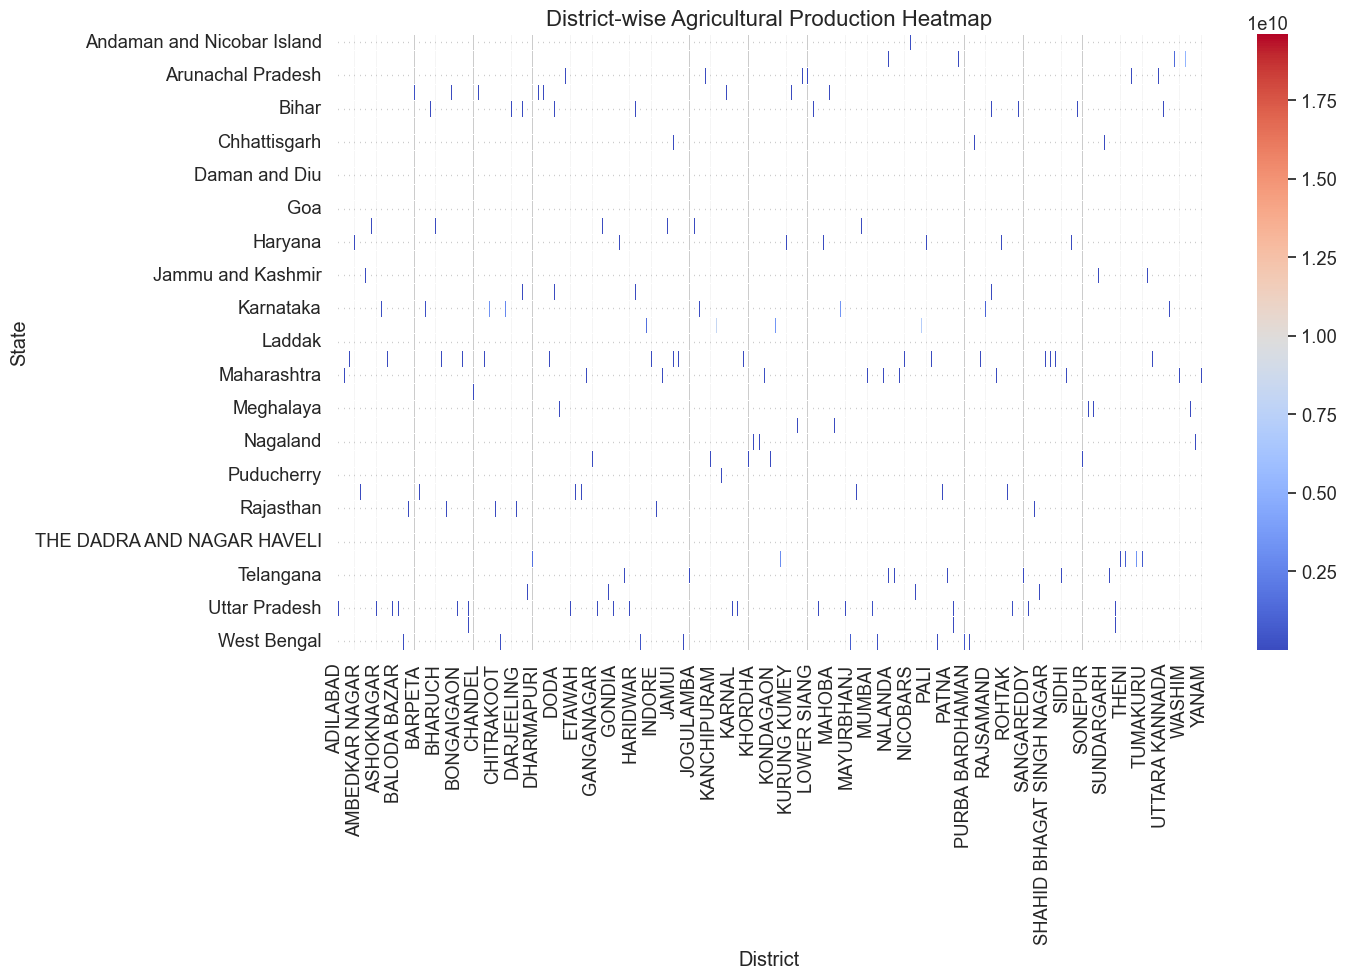

In [5]:
pivot_table = df.pivot_table(values="Production", index="State", columns="District", aggfunc="sum")
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.title("District-wise Agricultural Production Heatmap", fontsize=16)
plt.xlabel("District")
plt.ylabel("State")
plt.show()

### Insights

1. **State-Wise Production:**
   - Agricultural output is highly concentrated in a few key states. **Uttar Pradesh, Madhya Pradesh, and Rajasthan** lead in production, reinforcing their dominance in large-scale farming.

2. **Seasonal Trends:**
   - **Kharif and Rabi seasons** consistently drive production volumes, showing cyclical peaks. Recent decades indicate steady growth, likely due to improved farming techniques and increased data reporting.

3. **Area vs. Yield Efficiency:**
   - **Smaller cultivated areas often achieve high yields**, particularly in crops like **Sugarcane**, which maximize land efficiency. However, crops with large cultivation areas don’t always correlate with higher yields, signaling potential optimization gaps.

<Figure size 1400x600 with 0 Axes>

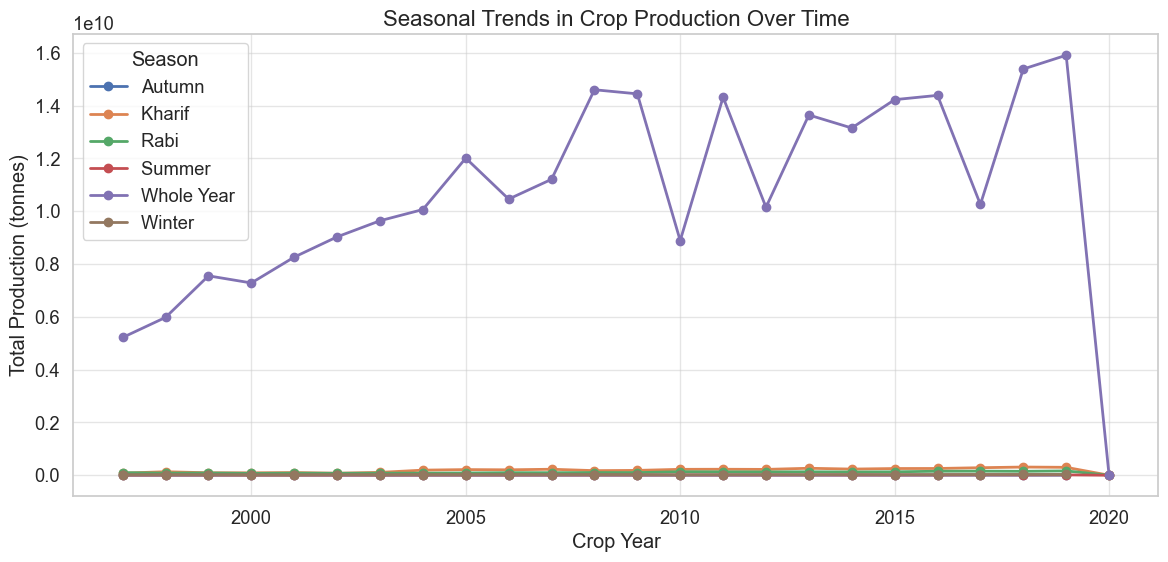

In [6]:
plt.figure(figsize=(14, 6))
season_trend = df.groupby(["Crop_Year", "Season"])["Production"].sum().unstack()
season_trend.plot(marker="o", figsize=(14, 6), linewidth=2)
plt.title("Seasonal Trends in Crop Production Over Time", fontsize=16)
plt.xlabel("Crop Year")
plt.ylabel("Total Production (tonnes)")
plt.legend(title="Season")
plt.grid(alpha=0.5)
plt.show()

### Insight

- **Steady Growth**: The graph shows a consistent increase in crop production across decades, reflecting advancements in agricultural practices and improved yield optimization.
- **Seasonal Peaks**: **Kharif and Rabi seasons** dominate production trends, with noticeable peaks aligning with monsoon and winter cycles, reinforcing their dependence on rainfall patterns.
- **Recent Fluctuations**: The last decade exhibits slight variations, suggesting climate impacts, shifting agricultural policies, or changing crop preferences.
- **Policy Implications**: Identifying dips or spikes can help policymakers prioritize irrigation infrastructure, crop insurance programs, and sustainable farming initiatives.

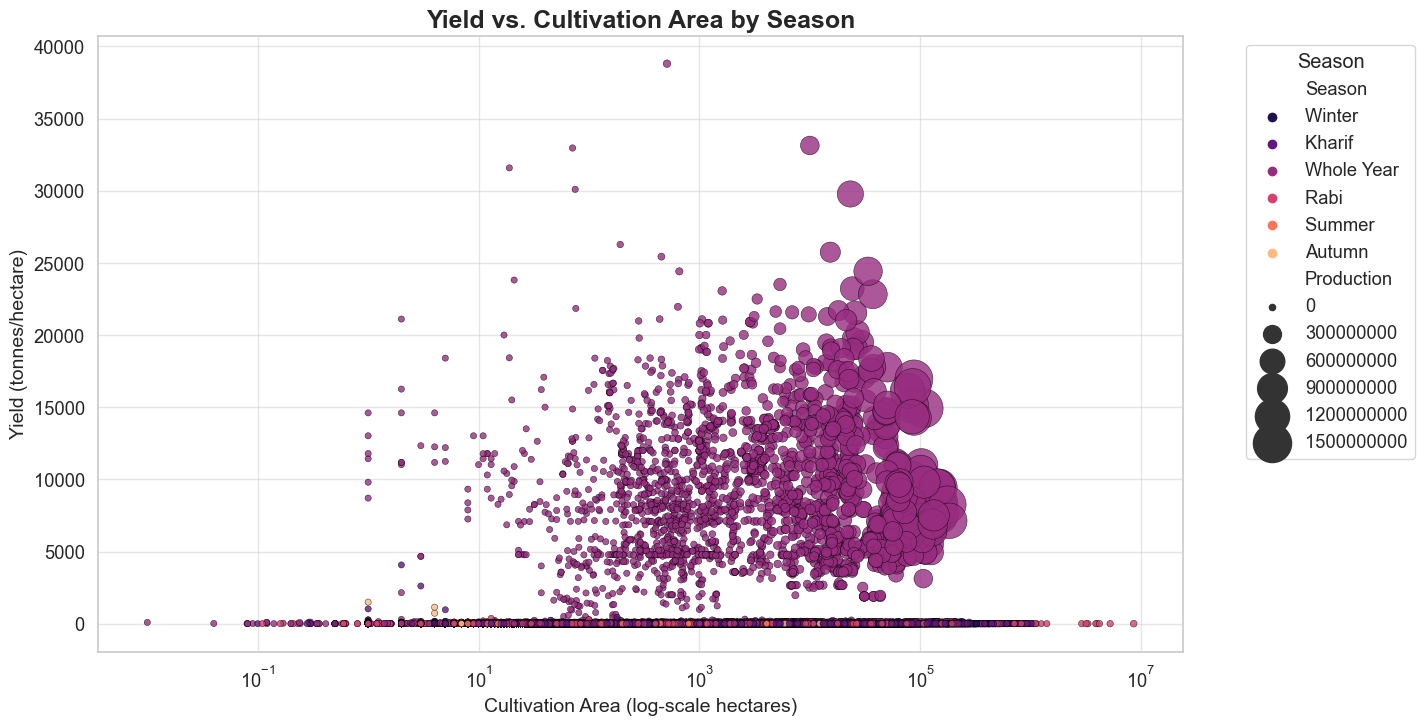

In [10]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="Area", y="Yield", size="Production", hue="Season", alpha=0.8, 
                palette="magma", edgecolor="black", sizes=(20, 800))
plt.xscale("log")  # Log scaling to handle extreme values
plt.title("Yield vs. Cultivation Area by Season", fontsize=18, fontweight="bold")
plt.xlabel("Cultivation Area (log-scale hectares)", fontsize=14)
plt.ylabel("Yield (tonnes/hectare)", fontsize=14)
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.show()

### Insights

1. **Smaller Areas, Higher Yield:** The scatter plot shows that several **small cultivated areas achieve exceptionally high yields**, likely due to optimized farming techniques or high-yield crops like **Sugarcane**.

2. **Kharif Season Dominates:** **Kharif crops** exhibit a wide range of cultivation areas but maintain steady yields, reinforcing their dependency on rainfall and seasonal factors.

3. **Yield Efficiency Fluctuates:** Larger cultivated areas do not always correspond to higher yields, indicating potential inefficiencies in farming practices or soil conditions that need to be explored.

4. **Seasonal Influence on Yield:** **Rabi crops tend to have a more controlled yield** distribution, possibly benefiting from structured irrigation, whereas **Kharif crops show more spread**, impacted by monsoon variability.

C:\Users\Kashvi\AppData\Local\Temp\ipykernel_16748\1655526843.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="Season", y="Yield", data=df, jitter=True, alpha=0.6, palette="coolwarm", size=6)


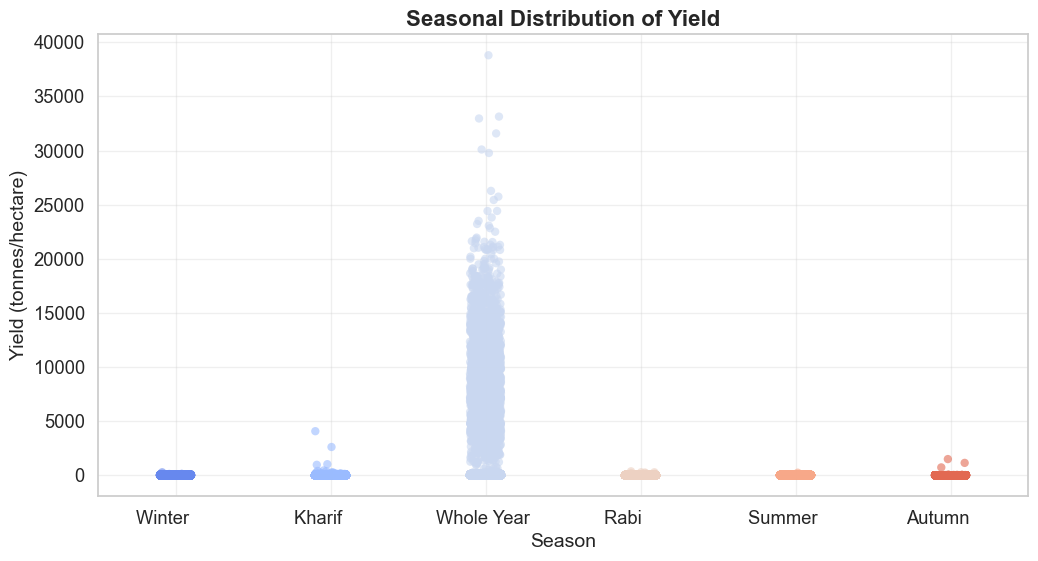

In [13]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="Season", y="Yield", data=df, jitter=True, alpha=0.6, palette="coolwarm", size=6)
plt.title("Seasonal Distribution of Yield", fontsize=16, fontweight="bold")
plt.xlabel("Season", fontsize=14)
plt.ylabel("Yield (tonnes/hectare)", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### Insight

- **Yield Fluctuations Across Seasons:** The **Kharif season** exhibits the widest spread in yield values, likely influenced by monsoon variability, soil conditions, and crop selection.
- **Rabi Season Stability:** **Rabi crops generally maintain a more consistent yield**, benefiting from structured irrigation and controlled climatic conditions.
- **Yield Extremes in Whole Year Crops:** Some **Whole Year crops** achieve exceptionally high yields, suggesting that **perennial farming techniques** might be more efficient for certain crops.
- **Potential Optimization Areas:** Significant variations in Kharif yield indicate opportunities for **better water management and improved farming techniques**.

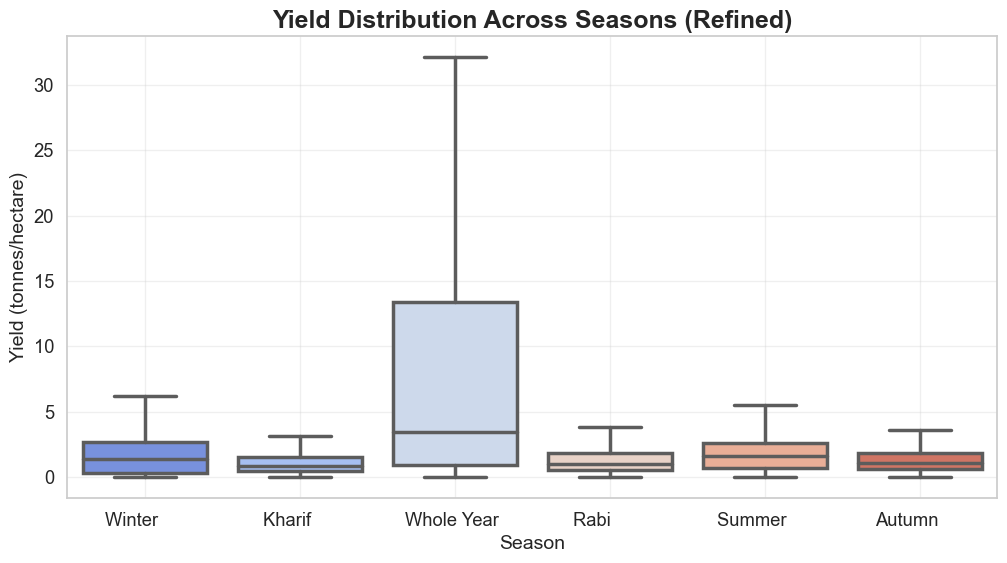

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load your agricultural data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Remove extreme outliers beyond the 99th percentile
upper_limit = np.percentile(df['Yield'], 99)
df_filtered = df[df['Yield'] <= upper_limit]

# Set up visualization parameters
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Improved Box plot of Yield by Season
sns.boxplot(x="Season", y="Yield", data=df_filtered, palette="coolwarm", showfliers=False, linewidth=2.5)

# Improve aesthetics
plt.title("Yield Distribution Across Seasons (Refined)", fontsize=18, fontweight="bold")
plt.xlabel("Season", fontsize=14)
plt.ylabel("Yield (tonnes/hectare)", fontsize=14)
plt.grid(alpha=0.3)

# Show plot
plt.show()

### Insights

- **Yield Stability in Rabi:** Rabi crops show **less variation**, benefiting from controlled irrigation and structured farming practices.  
- **Kharif Yield Variability:** Kharif season exhibits **wider fluctuations**, influenced by monsoon dependency and climate shifts.  
- **Whole Year Efficiency:** Some Whole Year crops demonstrate **higher yield potential**, highlighting sustained agricultural practices.  
- **Optimizing Seasonal Strategies:** Addressing yield instability in Kharif could improve overall agricultural efficiency.


#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

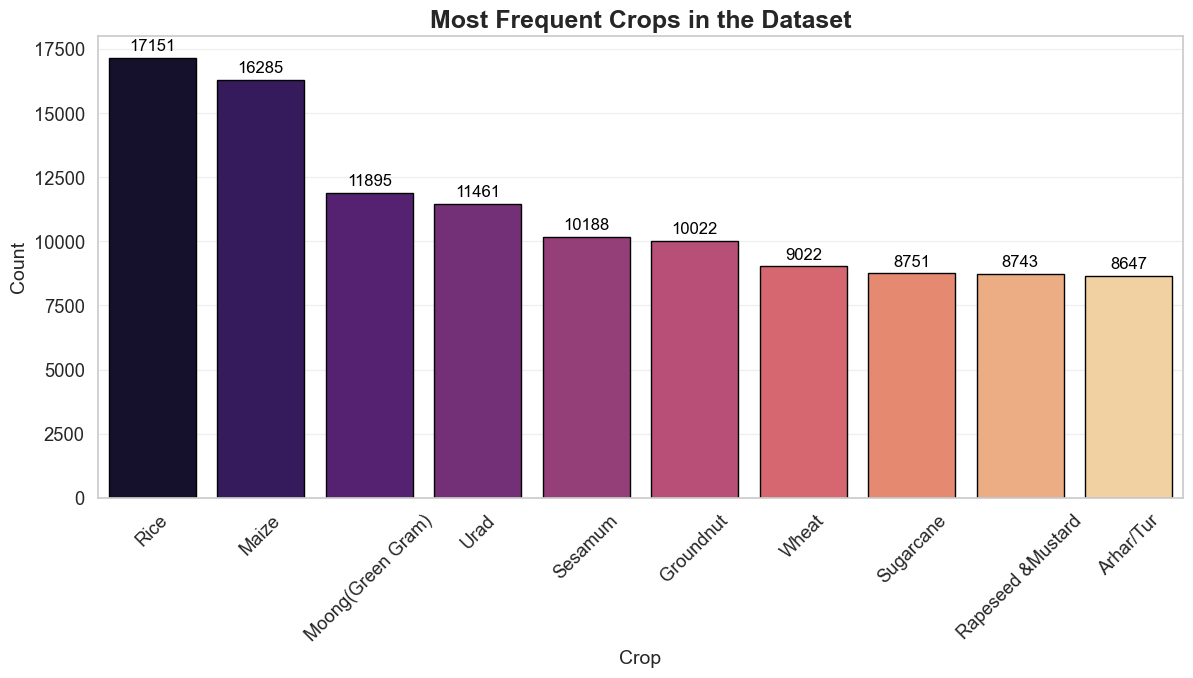

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your agricultural data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Set up visualization parameters
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Select top 10 most frequent crops
top_crops = df['Crop'].value_counts().head(10)

# Create count plot
ax = sns.barplot(x=top_crops.index, y=top_crops.values, palette="magma", edgecolor="black")

# Add value labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, color='black', label_type="edge", padding=3)

# Improve aesthetics
plt.title("Most Frequent Crops in the Dataset", fontsize=18, fontweight="bold")
plt.xlabel("Crop", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.show()

### Insights 
- **Dominance of Staple Crops:** Crops like **Rice, Wheat, and Maize** appear most frequently, reinforcing their importance in food security.  
- **Regional Specializations:** High counts of **Sugarcane and Cotton** suggest strong state-level agricultural focus on cash crops.  
- **Potential Market Trends:** The frequent appearance of **Moong and Urad** highlights rising demand for pulses.  

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Kashvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `h

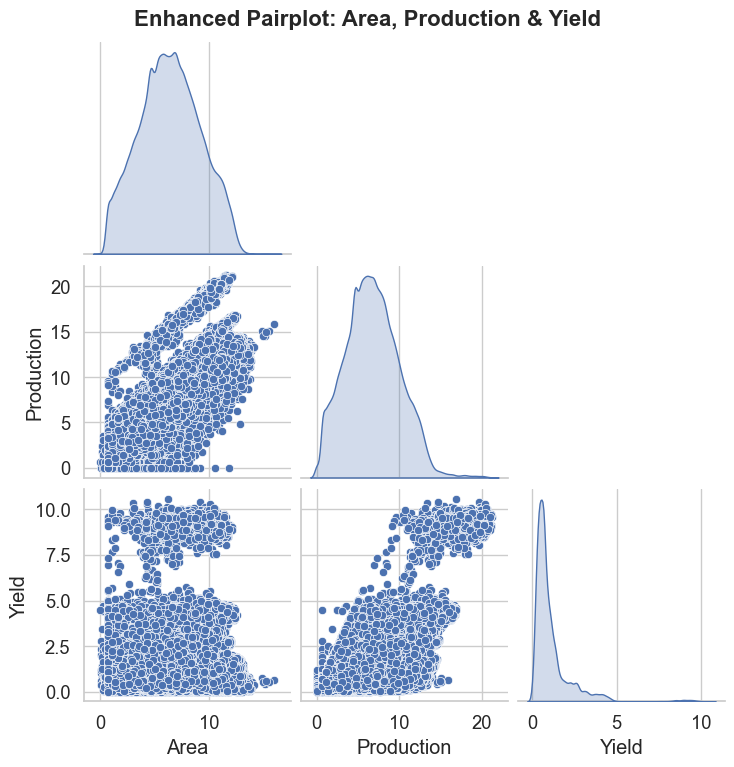

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load agricultural data
df = pd.read_csv(r'C:\Users\Kashvi\Downloads\notebook\notebook\data\raw.csv')

# Apply log transformation to reduce skewness (excluding zero values)
df["Production"] = np.log1p(df["Production"])
df["Area"] = np.log1p(df["Area"])
df["Yield"] = np.log1p(df["Yield"])

# Select numerical columns
num_cols = ["Area", "Production", "Yield"]

# Set up visualization parameters
sns.set_style("whitegrid")

# Improved Pairplot
pairplot = sns.pairplot(df[num_cols], diag_kind="kde", corner=True, palette="coolwarm")

# Adjust plot aesthetics
pairplot.fig.suptitle("Enhanced Pairplot: Area, Production & Yield", fontsize=16, fontweight="bold", y=1.02)

# Show plot
plt.show()

### Insights

- **Yield vs. Production:** Shows a **moderate correlation**, meaning higher yield doesn't always result in higher total production.  
- **Area vs. Yield:** Larger cultivation areas don’t necessarily lead to higher yield, indicating efficiency gaps.  
- **Seasonal Effects Visible:** Clusters suggest **seasonal patterns** affecting yield and production distribution.  


### Conclusions

1. **Problem Statement**: Predict crop yield using variables like state, district, crop type, year, season, area, and production.
2. **Data Overview**: Dataset with 8 columns, highlighting variability in `Area`, `Production`, and `Yield`.
3. **Data Cleaning**: Addressed missing values, duplicates, and outliers.
4. **Visualizations**:
   - Distribution of `Area`, `Production`, and `Yield` (log-transformed).
   - Seasonal trends, crop-wise yield, and state-wise production.
   - Correlation heatmaps and scatterplots for multivariate analysis.
5. **Key Insights**:
   - Kharif season shows high variability; Rabi is more stable.
   - Sugarcane is the most efficient crop in yield and land use.
   - Larger cultivated areas don't always yield higher production.
6. **Recommendations**:
   - Improve Kharif season stability with better water management.
   - Optimize farming practices for large-scale crops.
   - Investigate outliers for potential inefficiencies.

This analysis provides a foundation for predictive modeling and agricultural planning.